### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import warnings

warnings.simplefilter("ignore")

### Fetching Stock Data from Yahoo Finance 

In [2]:
amzn_data = yf.download('AMZN',start='2015-01-01',end='2020-10-08',progress=False,auto_adjust=True)

### Processing Data to get Required Information

In [3]:
amzn_data = amzn_data.drop(['Open','High','Low','Volume'],axis=1)
amzn_data['Returns'] = (amzn_data.Close/amzn_data.Close.shift(1))-1

In [4]:
amzn_data = amzn_data.dropna()
amzn_data_resampled = amzn_data.resample('M').mean()

### Visualizing the Data

In [5]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [6]:
cf.set_config_file(world_readable=True, theme='pearl',offline=True)

In [7]:
amzn_data_resampled.iplot(subplots=True, shape=(2,1), shared_xaxes=True, title='Amazon time series (resampled monthly)')

### Removing Outliers from Returns Data

In [8]:
amzn_data.Returns.describe()

count    1412.000000
mean        0.001812
std         0.019329
min        -0.079221
25%        -0.006965
50%         0.001428
75%         0.010673
max         0.141311
Name: Returns, dtype: float64

In [9]:
amzn_data['Rolling_Ret'] = amzn_data.Returns.rolling(window=21).mean()

In [10]:
amzn_data['Delta'] = amzn_data.Returns.rolling(window=21).std()
amzn_data['DelUp'] = amzn_data.Rolling_Ret + 2*amzn_data['Delta']
amzn_data['DelDown'] = amzn_data.Rolling_Ret - 2*amzn_data['Delta']

In [11]:
amzn_data['Return_Outliers'] = amzn_data.Returns[(amzn_data.Returns>amzn_data.DelUp) | (amzn_data.Returns<amzn_data.DelDown)]

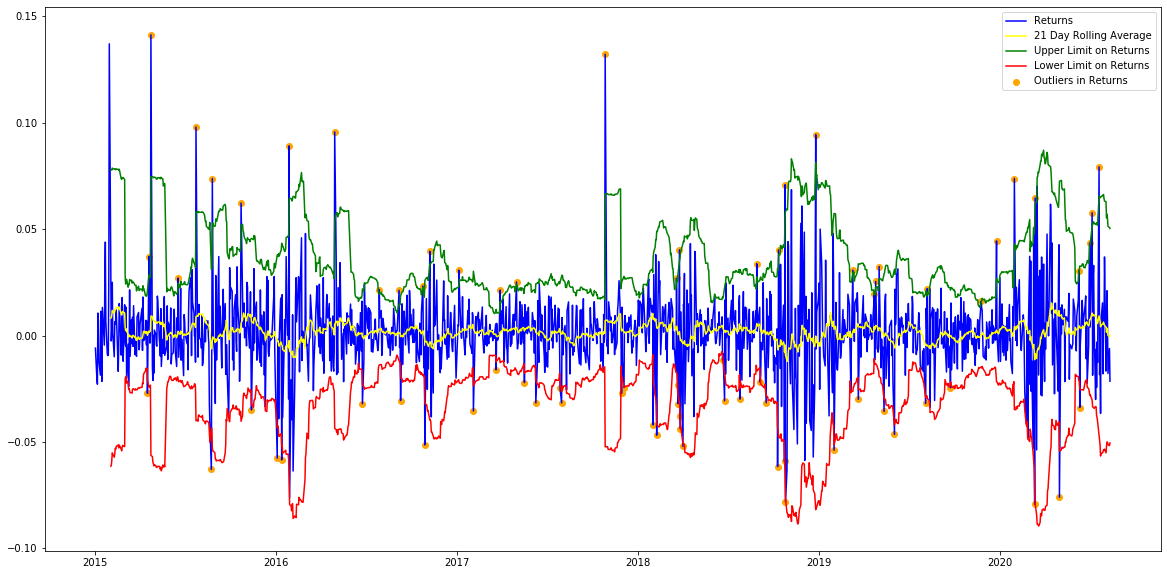

In [12]:
plt.figure(figsize=(20,10))
plt.plot(amzn_data.Returns,label='Returns',color='blue')
plt.plot(amzn_data.Rolling_Ret,label='21 Day Rolling Average',color='yellow')
plt.plot(amzn_data.DelUp,label='Upper Limit on Returns',color='green')
plt.plot(amzn_data.DelDown,label='Lower Limit on Returns',color='red')
plt.scatter(amzn_data.index,amzn_data.Return_Outliers, label = 'Outliers in Returns', color = 'orange')
plt.legend()
plt.show()

### Analysis of Returns

Text(0.5, 1.0, 'Q-Q plot')

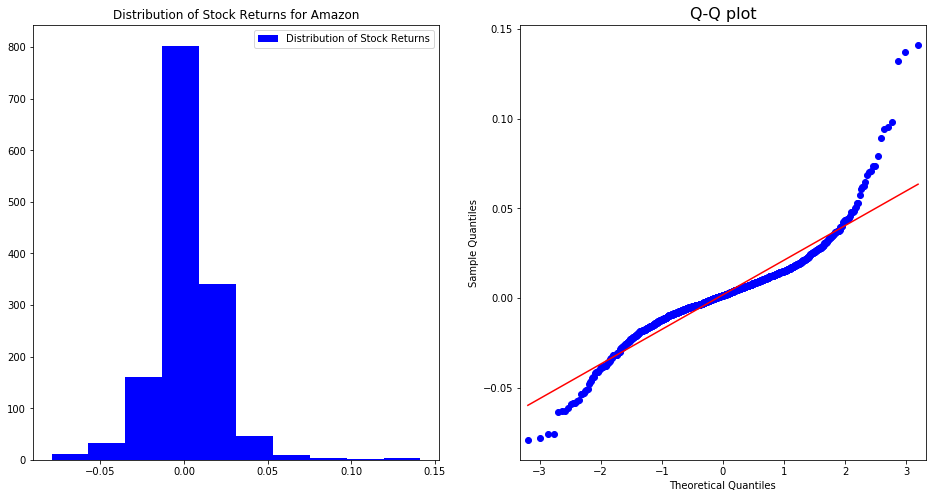

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title("Distribution of Stock Returns for Amazon")
ax[0].hist(amzn_data.Returns, label = "Distribution of Stock Returns", color = "Blue", histtype="bar")
ax[0].legend()
ax[0].plot()
# Q-Q plot
qq = sm.qqplot(amzn_data.Returns, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

In [14]:
import statsmodels.tsa.api as smt

Autocorrelation of Stock Returns:


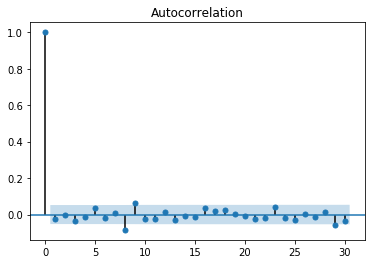

In [15]:
print("Autocorrelation of Stock Returns:")
acf = smt.graphics.plot_acf(amzn_data.Returns,lags=30)